In [1]:
import sys
sys.path

['/home/changgoo/pyathena_master/notebook',
 '/home/changgoo/pyathena',
 '/home/changgoo/.conda/envs/pyathena-lem/lib/python39.zip',
 '/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9',
 '/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/lib-dynload',
 '',
 '/home/changgoo/.local/lib/python3.9/site-packages',
 '/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages',
 '/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/colorspacious-1.1.2-py3.9.egg',
 '/home/changgoo/yt-changgoo']

In [2]:
sys.path.pop(1)
sys.path.pop(-1)

'/home/changgoo/yt-changgoo'

In [3]:
sys.path.insert(0,'../')

In [4]:
sys.path

['../',
 '/home/changgoo/pyathena_master/notebook',
 '/home/changgoo/.conda/envs/pyathena-lem/lib/python39.zip',
 '/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9',
 '/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/lib-dynload',
 '',
 '/home/changgoo/.local/lib/python3.9/site-packages',
 '/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages',
 '/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/colorspacious-1.1.2-py3.9.egg']

In [5]:
import pyathena as pa

[1689349384.816980] [stellar-vis1:559676:0]         ib_mlx5.h:870  UCX  ERROR mlx5dv_devx_umem_reg() failed: Cannot allocate memory : Please set max locked memory (ulimit -l) to 'unlimited' (current: 64 kbytes)


[stellar-vis1.princeton.edu:559676] mca_base_component_repository_open: unable to open mca_op_avx: /usr/local/openmpi/4.1.0/gcc/lib64/openmpi/mca_op_avx.so: undefined symbol: ompi_op_base_module_t_class (ignored)
[stellar-vis1.princeton.edu:559676] pml_ucx.c:273  Error: Failed to create UCP worker


In [6]:
sim = pa.LoadSim('/scratch/gpfs/changgoo/WO_N128_R20_hydro/',verbose=True,load_method='yt')

[LoadSim-INFO] savdir : /scratch/gpfs/changgoo/WO_N128_R20_hydro
[LoadSim-INFO] basedir: /scratch/gpfs/changgoo/WO_N128_R20_hydro
[LoadSim-INFO] athinput: /scratch/gpfs/changgoo/WO_N128_R20_hydro/out.txt
[LoadSim-INFO] athena simulation
[LoadSim-INFO] problem_id: mfb
[LoadSim-INFO] timeit: /scratch/gpfs/changgoo/WO_N128_R20_hydro/timeit.txt
[LoadSim-INFO] hst: /scratch/gpfs/changgoo/WO_N128_R20_hydro/id0/mfb.hst
[LoadSim-INFO] vtk in id0: /scratch/gpfs/changgoo/WO_N128_R20_hydro/id0 nums: 0-101
[LoadSim-INFO] rst: /scratch/gpfs/changgoo/WO_N128_R20_hydro/rst nums: 1-1


In [7]:
ds = sim.load_vtk(50)

yt : [INFO     ] 2023-07-14 11:43:05,867 Temporarily setting domain_right_edge = -domain_left_edge. This will be corrected automatically if it is not the case.
yt : [WARNING  ] 2023-07-14 11:43:05,917 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2023-07-14 11:43:05,918 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2023-07-14 11:43:05,918 Overriding time_unit: 0.9777922216807893 Myr.
yt : [INFO     ] 2023-07-14 11:43:05,919 Overriding mass_unit: 0.0346244904274392 Msun.
yt : [INFO     ] 2023-07-14 11:43:05,976 Parameters: current_time              = 1.190014
yt : [INFO     ] 2023-07-14 11:43:05,977 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2023-07-14 11:43:05,978 Parameters: domain_left_edge          = [-20. -20. -20.]
yt : [INFO     ] 2023-07-14 11:43:05,979 Parameters: domain_right_edge         = [20. 20. 20.]
yt : [INFO     ] 2023-07-14 11:43:05,980 Parameters: c

In [8]:
# you will need all these fields for pyxsim
print(("gas","temperature") in ds.derived_field_list,
      ("gas","emission_measure") in ds.derived_field_list,
      ("gas","H_nuclei_density") in ds.derived_field_list,
      ("gas","El_number_density") in ds.derived_field_list)

True False False False


In [9]:
from pyathena.xray import Xray

soxs : [WARNING  ] 2023-07-14 11:43:07,212 Setting 'soxs_data_dir' to /home/changgoo/.cache/soxs for this session. Please update your configuration if you want it somewhere else.


In [10]:
Xds = Xray(sim,ds)

In [11]:
Xds.add_ytfields()

In [12]:
# you will need all these fields for pyxsim
ds = Xds.ytds
print(("gas","temperature") in ds.derived_field_list,
      ("gas","emission_measure") in ds.derived_field_list,
      ("gas","H_nuclei_density") in ds.derived_field_list,
      ("gas","El_number_density") in ds.derived_field_list)

True True True True


In [13]:
Xds.add_xray_fields(model='apec',emin=0.1,emax=10,nbins=1000,Zmet=1.0,binscale='log')

pyxsim : [INFO     ] 2023-07-14 11:43:07,664 kT_min = 0.025 keV
pyxsim : [INFO     ] 2023-07-14 11:43:07,665 kT_max = 64 keV
pyxsim : [INFO     ] 2023-07-14 11:43:07,666 Using emission measure field '('gas', 'emission_measure')'.
pyxsim : [INFO     ] 2023-07-14 11:43:07,666 Using temperature field '('gas', 'temperature')'.


Preparing spectrum table :   0%|          | 0/138 [00:00<?, ?it/s]

In [14]:
import yt

yt : [INFO     ] 2023-07-14 11:43:17,336 xlim = -20.000000 20.000000
yt : [INFO     ] 2023-07-14 11:43:17,337 ylim = -20.000000 20.000000
yt : [INFO     ] 2023-07-14 11:43:17,337 xlim = -20.000000 20.000000
yt : [INFO     ] 2023-07-14 11:43:17,338 ylim = -20.000000 20.000000
yt : [INFO     ] 2023-07-14 11:43:17,341 Making a fixed resolution buffer of (('gas', 'emission_measure')) 800 by 800
yt : [INFO     ] 2023-07-14 11:43:17,637 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO     ] 2023-07-14 11:43:17,707 Making a fixed resolution buffer of (('gas', 'xray_emissivity_0.5_7.0_keV')) 800 by 800



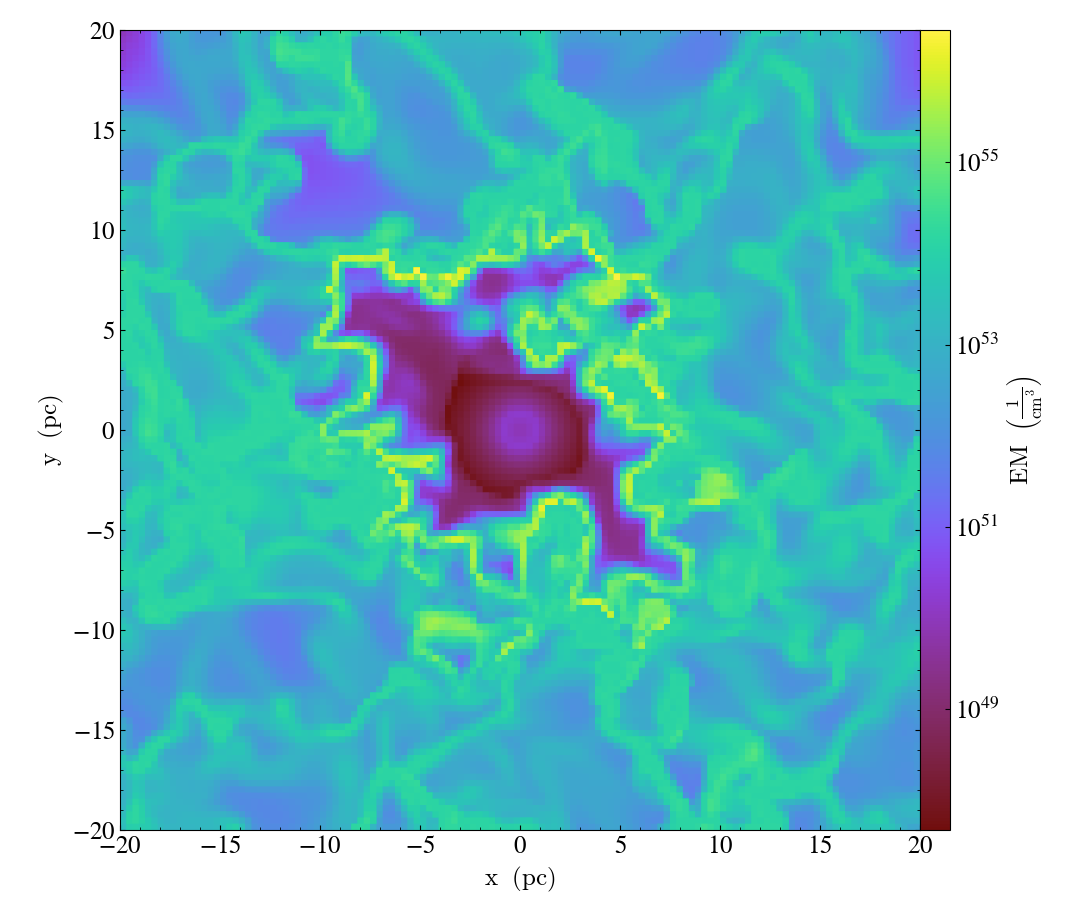
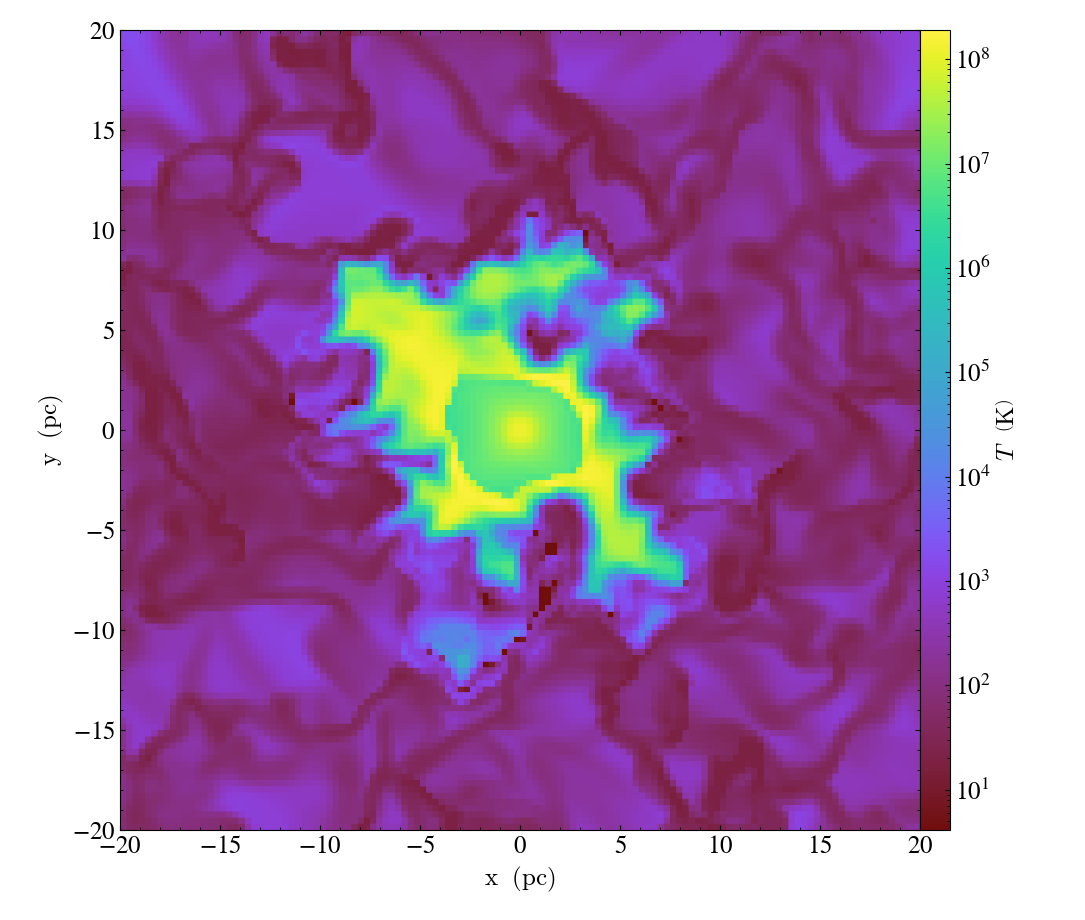
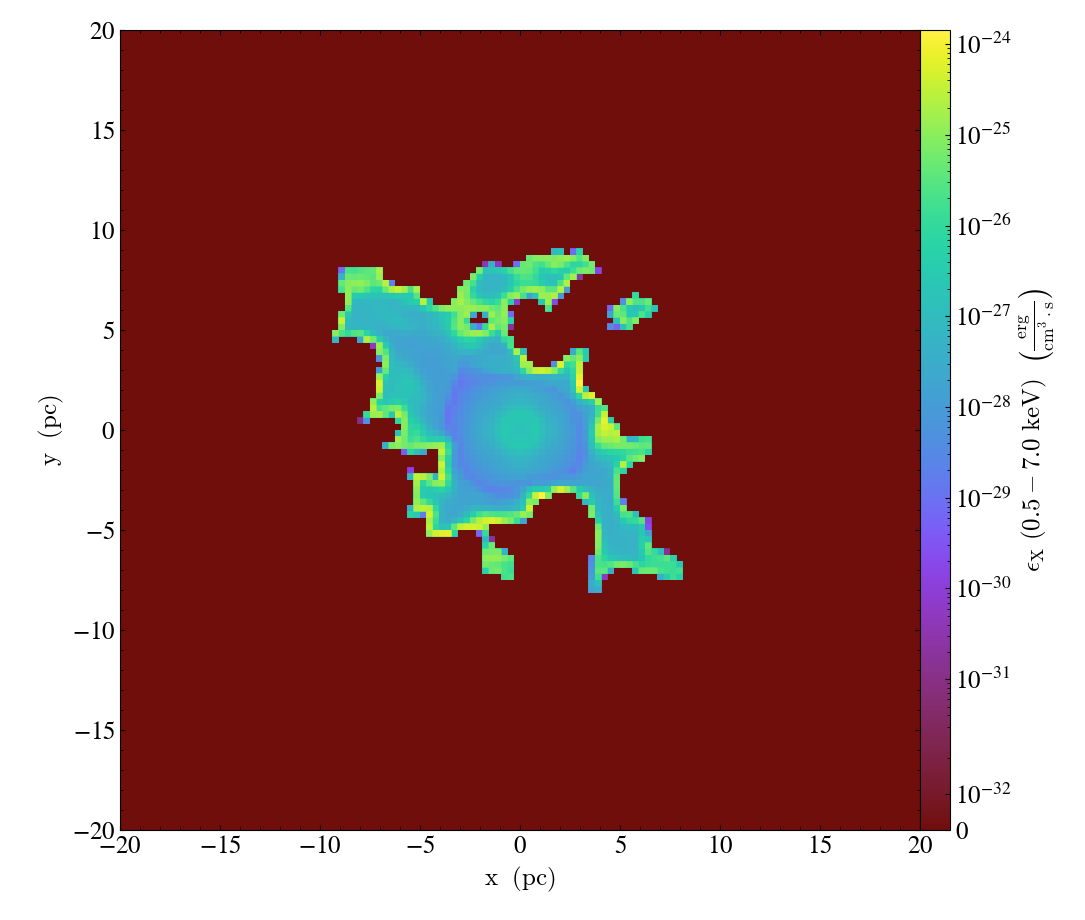

In [15]:
yt.SlicePlot(ds,normal='z',fields=[("gas","temperature"),("gas","emission_measure"),Xds.xray_fields[0]])

yt : [INFO     ] 2023-07-14 11:43:21,057 Projection completed
yt : [INFO     ] 2023-07-14 11:43:21,059 xlim = -20.000000 20.000000
yt : [INFO     ] 2023-07-14 11:43:21,059 ylim = -20.000000 20.000000
yt : [INFO     ] 2023-07-14 11:43:21,060 xlim = -20.000000 20.000000
yt : [INFO     ] 2023-07-14 11:43:21,060 ylim = -20.000000 20.000000
yt : [INFO     ] 2023-07-14 11:43:21,061 Making a fixed resolution buffer of (('gas', 'emission_measure')) 800 by 800
yt : [INFO     ] 2023-07-14 11:43:21,135 Making a fixed resolution buffer of (('gas', 'xray_emissivity_0.5_7.0_keV')) 800 by 800



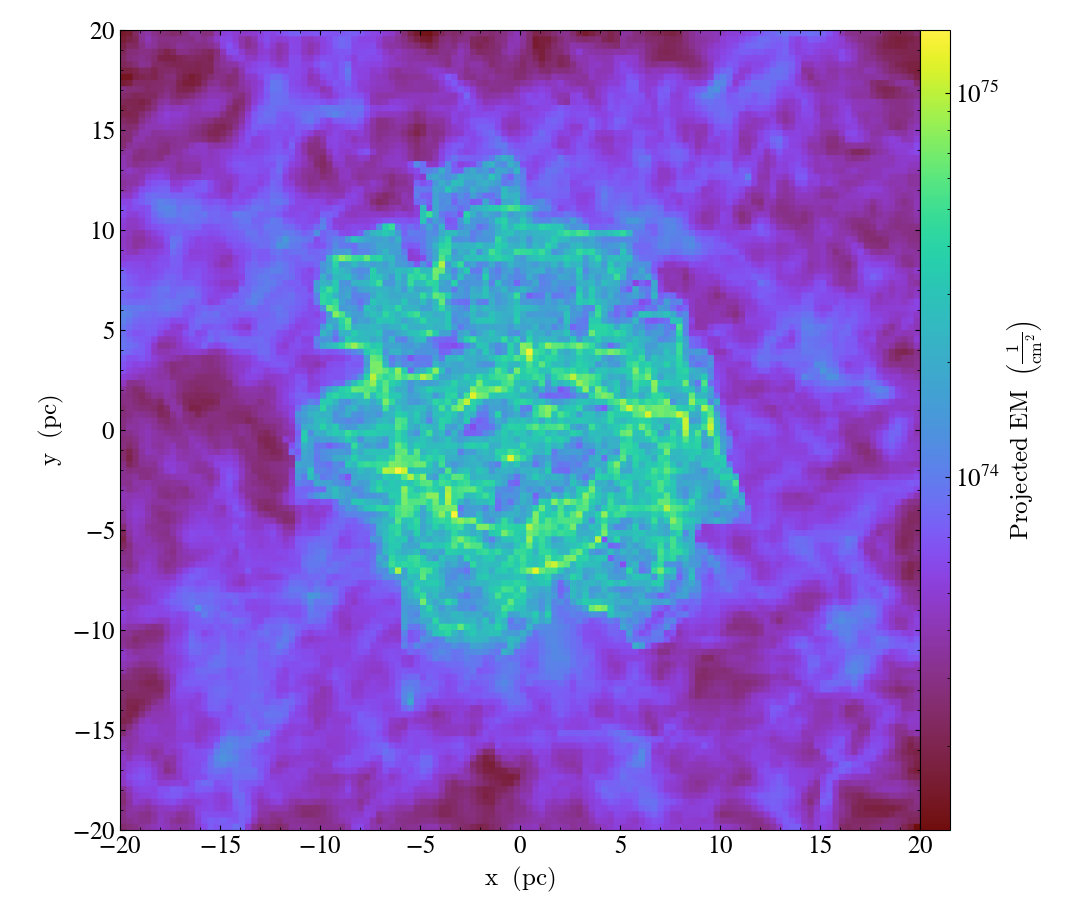
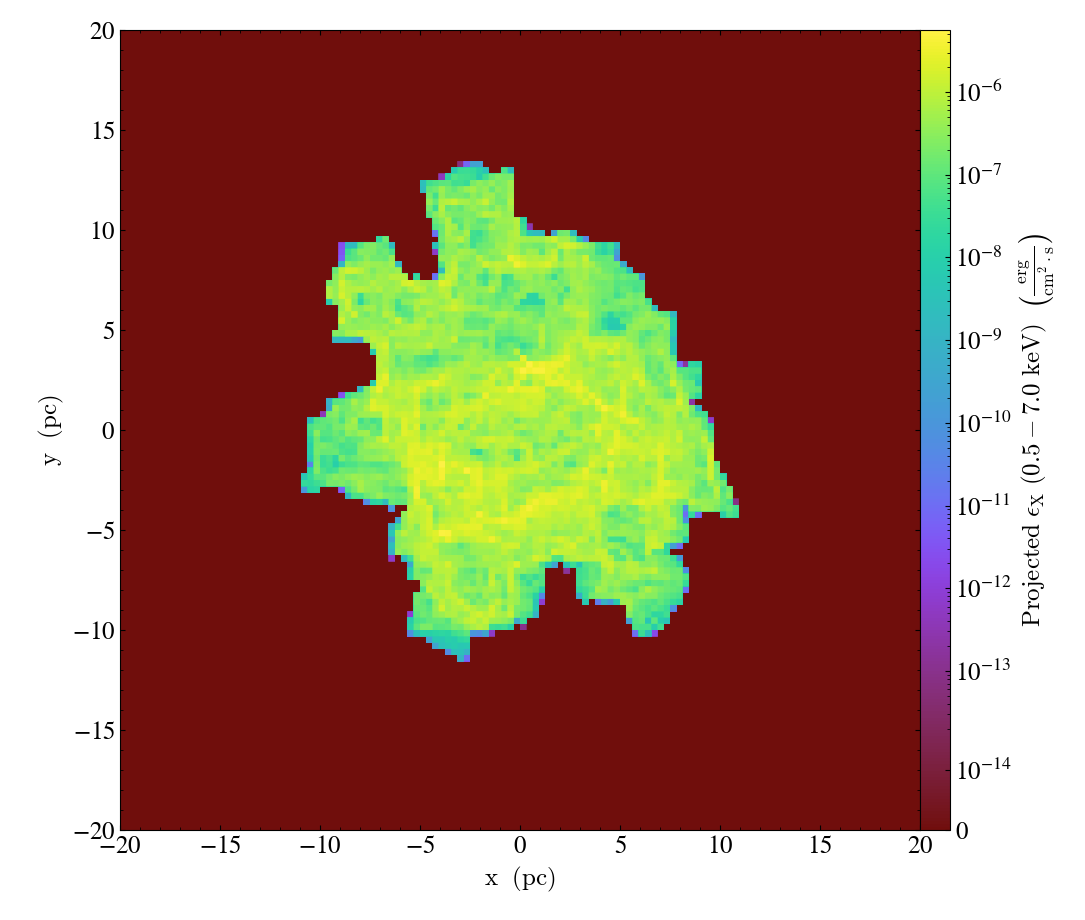

In [16]:
yt.ProjectionPlot(ds,normal='z',fields=[("gas","emission_measure"),Xds.xray_fields[0]])

In [17]:
prof = Xds.create_profile()
prof = Xds.convert_profile_to_dataset(prof)

(100000.0, 1000000000.0)

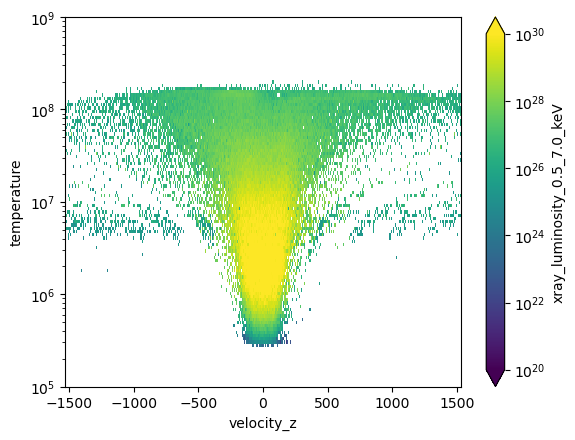

In [18]:
prof[Xds.xray_fields[1][1]].plot(norm=LogNorm(1.e20,1.e30))
plt.yscale('log')
plt.ylim(1.e5,1.e9)

In [19]:
import pyxsim

In [20]:
Xds.make_photons(dist_kpc=10,exp_time=(10,'ks'),overwrite=True)

pyxsim : [INFO     ] 2023-07-14 11:43:26,317 Observing local source at distance 10.
pyxsim : [INFO     ] 2023-07-14 11:43:26,319 Using emission measure field '('gas', 'emission_measure')'.
pyxsim : [INFO     ] 2023-07-14 11:43:26,320 Using temperature field '('gas', 'temperature')'.


Preparing spectrum table :   0%|          | 0/138 [00:00<?, ?it/s]

Processing cells/particles :   0%|          | 0/2097152 [00:00<?, ?it/s]

pyxsim : [INFO     ] 2023-07-14 11:43:37,038 Finished generating photons.
pyxsim : [INFO     ] 2023-07-14 11:43:37,039 Number of photons generated: 1033608
pyxsim : [INFO     ] 2023-07-14 11:43:37,040 Number of cells with photons: 20579


In [21]:
Xds.project_photons(overwrite=True)

pyxsim : [INFO     ] 2023-07-14 11:43:37,081 Foreground galactic absorption: using the tbabs model and nH = 0.02.


Projecting photons from cells/particles :   0%|          | 0/20579 [00:00<?, ?it/s]

pyxsim : [INFO     ] 2023-07-14 11:43:37,363 Detected 64059 events.


In [22]:
Xds.create_simput()

soxs : [WARNING  ] 2023-07-14 11:43:37,479 Overwriting /scratch/gpfs/changgoo/WO_N128_R20_hydro/xray/mfb.0050_10kpc_z_phlist.fits.
soxs : [INFO     ] 2023-07-14 11:43:37,521 Writing source 'mfb.0050_10kpc_z' to /scratch/gpfs/changgoo/WO_N128_R20_hydro/xray/mfb.0050_10kpc_z_phlist.fits.


In [23]:
Xds.instrument_simulator(overwrite=True)

soxs : [INFO     ] 2023-07-14 11:43:37,558 Making observation of source in /scratch/gpfs/changgoo/WO_N128_R20_hydro/xray/mfb.0050_10kpc_z_src_100ks_lem_2eV.fits.
soxs : [INFO     ] 2023-07-14 11:43:37,737 Detecting events from source mfb.0050_10kpc_z.
soxs : [INFO     ] 2023-07-14 11:43:37,738 Applying energy-dependent effective area from lem_300522.arf.
soxs : [INFO     ] 2023-07-14 11:43:37,745 Pixeling events.
soxs : [INFO     ] 2023-07-14 11:43:37,749 Scattering events with a gaussian-based PSF.
soxs : [INFO     ] 2023-07-14 11:43:37,753 19501 events were detected from the source.
soxs : [INFO     ] 2023-07-14 11:43:37,755 Scattering energies with RMF lem_2ev_110422.rmf.


Scattering energies :   0%|          | 0/19501 [00:00<?, ?it/s]

soxs : [INFO     ] 2023-07-14 11:43:38,742 No backgrounds will be added to this observation.
soxs : [INFO     ] 2023-07-14 11:43:38,743 Writing events to file /scratch/gpfs/changgoo/WO_N128_R20_hydro/xray/mfb.0050_10kpc_z_src_100ks_lem_2eV.fits.
soxs : [INFO     ] 2023-07-14 11:43:38,811 Observation complete.
soxs : [INFO     ] 2023-07-14 11:43:39,014 Making observation of source in /scratch/gpfs/changgoo/WO_N128_R20_hydro/xray/mfb.0050_10kpc_z_onsrc_100ks_lem_2eV.fits.
soxs : [INFO     ] 2023-07-14 11:43:39,193 Detecting events from source mfb.0050_10kpc_z.
soxs : [INFO     ] 2023-07-14 11:43:39,194 Applying energy-dependent effective area from lem_300522.arf.
soxs : [INFO     ] 2023-07-14 11:43:39,200 Pixeling events.
soxs : [INFO     ] 2023-07-14 11:43:39,204 Scattering events with a gaussian-based PSF.
soxs : [INFO     ] 2023-07-14 11:43:39,207 19534 events were detected from the source.
soxs : [INFO     ] 2023-07-14 11:43:39,209 Scattering energies with RMF lem_2ev_110422.rmf.


Scattering energies :   0%|          | 0/19534 [00:00<?, ?it/s]

soxs : [INFO     ] 2023-07-14 11:43:40,193 Adding background events.
soxs : [INFO     ] 2023-07-14 11:43:40,360 Adding in point-source background.
soxs : [INFO     ] 2023-07-14 11:43:43,049 Detecting events from source ptsrc_bkgnd.
soxs : [INFO     ] 2023-07-14 11:43:43,050 Applying energy-dependent effective area from lem_300522.arf.
soxs : [INFO     ] 2023-07-14 11:43:43,151 Pixeling events.
soxs : [INFO     ] 2023-07-14 11:43:43,213 Scattering events with a gaussian-based PSF.
soxs : [INFO     ] 2023-07-14 11:43:43,245 331592 events were detected from the source.
soxs : [INFO     ] 2023-07-14 11:43:43,264 Scattering energies with RMF lem_2ev_110422.rmf.


Scattering energies :   0%|          | 0/331592 [00:00<?, ?it/s]

soxs : [INFO     ] 2023-07-14 11:43:47,887 Generated 331592 photons from the point-source background.
soxs : [INFO     ] 2023-07-14 11:43:47,888 Adding in astrophysical foreground.


Convolving spectrum :   0%|          | 0/12000 [00:00<?, ?it/s]

soxs : [INFO     ] 2023-07-14 11:43:55,918 Adding in instrumental background.
soxs : [INFO     ] 2023-07-14 11:43:56,050 Making 606973 events from the galactic foreground.
soxs : [INFO     ] 2023-07-14 11:43:56,051 Making 340643 events from the instrumental background.
soxs : [INFO     ] 2023-07-14 11:43:56,202 Writing events to file /scratch/gpfs/changgoo/WO_N128_R20_hydro/xray/mfb.0050_10kpc_z_onsrc_100ks_lem_2eV.fits.
soxs : [INFO     ] 2023-07-14 11:43:56,547 Observation complete.
soxs : [INFO     ] 2023-07-14 11:43:56,987 Making observation of source in /scratch/gpfs/changgoo/WO_N128_R20_hydro/xray/mfb.0050_10kpc_z_offsrc_100ks_lem_2eV.fits.
soxs : [INFO     ] 2023-07-14 11:43:57,163 Detecting events from source mfb.0050_10kpc_z.
soxs : [INFO     ] 2023-07-14 11:43:57,164 Applying energy-dependent effective area from lem_300522.arf.
soxs : [INFO     ] 2023-07-14 11:43:57,170 Pixeling events.
soxs : [INFO     ] 2023-07-14 11:43:57,174 Scattering events with a gaussian-based PSF.
so

Scattering energies :   0%|          | 0/372143 [00:00<?, ?it/s]

soxs : [INFO     ] 2023-07-14 11:44:05,200 Generated 372143 photons from the point-source background.
soxs : [INFO     ] 2023-07-14 11:44:05,201 Adding in astrophysical foreground.


Convolving spectrum :   0%|          | 0/12000 [00:00<?, ?it/s]

soxs : [INFO     ] 2023-07-14 11:44:13,177 Adding in instrumental background.
soxs : [INFO     ] 2023-07-14 11:44:13,281 Making 606965 events from the galactic foreground.
soxs : [INFO     ] 2023-07-14 11:44:13,281 Making 341534 events from the instrumental background.
soxs : [INFO     ] 2023-07-14 11:44:13,419 Writing events to file /scratch/gpfs/changgoo/WO_N128_R20_hydro/xray/mfb.0050_10kpc_z_offsrc_100ks_lem_2eV.fits.
soxs : [INFO     ] 2023-07-14 11:44:13,766 Observation complete.


In [24]:
imgfiles = sorted(Xds.find_img_files())

In [25]:
specfiles = sorted(Xds.find_spec_files())

In [26]:
fsrc=imgfiles[2]
fonsrc=imgfiles[1]

In [27]:
spec_fname=specfiles[1]

In [28]:
import aplpy

In [29]:
dist,axis,target,exp,inst = Xds.parse_filename(fsrc)

In [30]:
dist = float(dist.replace('kpc',''))
exp = float(exp.replace('ks',''))

In [31]:
import soxs

In [32]:
from astropy.io import fits


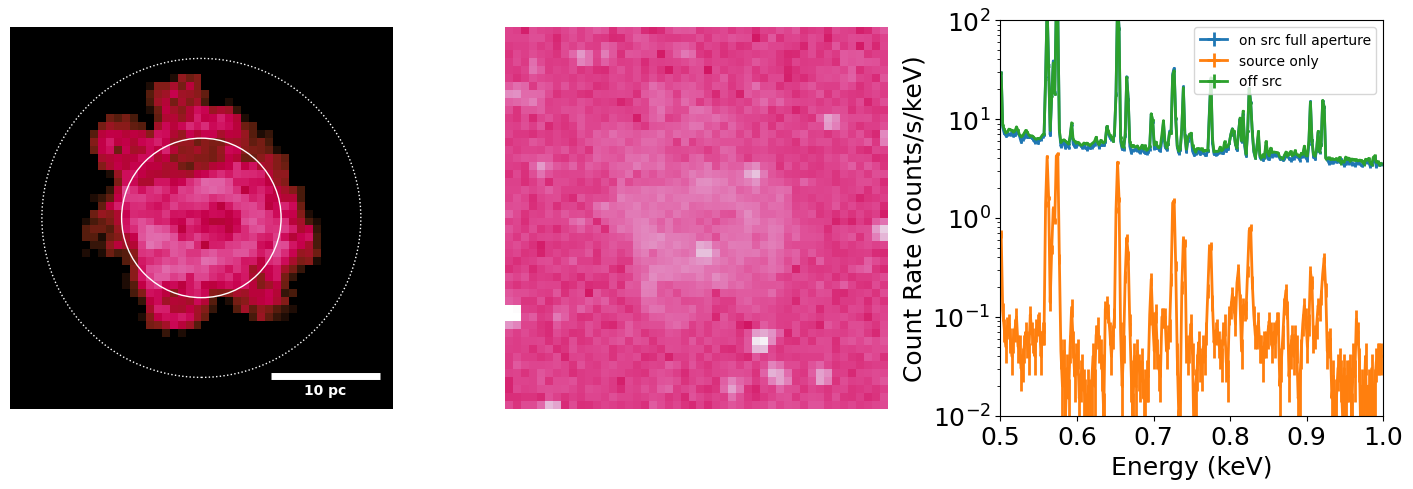

In [33]:
exp_time = exp*1.e3
inst_spec = soxs.instrument_registry[inst]
arcminperpixel = inst_spec['fov']/inst_spec['num_pixels']
min_ctsperarcminsq = 1/arcminperpixel**2
max_ctsperarcminsq = 1000./arcminperpixel**2
min_ctspersecperarcminsq = min_ctsperarcminsq/exp_time
max_ctspersecperarcminsq = max_ctsperarcminsq/exp_time    
length=np.rad2deg(((10*ac.pc)/(dist*ac.kpc)).cgs.value)

fig = plt.figure(figsize=(15,5))
with fits.open(fsrc) as img:
    img[0].data = img[0].data/exp_time/arcminperpixel**2
ax = aplpy.FITSFigure(img,figure=fig,subplot=(1,3,1))
ax.show_colorscale(vmin=min_ctspersecperarcminsq,vmax=max_ctspersecperarcminsq,stretch='log',cmap=cmr.flamingo)
ax.show_circles(45,30,5/60.,color='w',ls=':',label="6")
ax.show_circles(45,30,2.5/60.,color='w',label="3")
ax.recenter(45,30,0.1)
ax.ax.axis('off')
ax.add_scalebar(length)
ax.scalebar.set_label('10 pc')
ax.scalebar.set_color('white')
ax.scalebar.set_linewidth(5)
ax.scalebar.set_font_weight('bold')

with fits.open(fonsrc) as img:
    img[0].data = img[0].data/exp_time/arcminperpixel**2
ax = aplpy.FITSFigure(img,figure=fig,subplot=(1,3,2))
ax.show_colorscale(vmin=min_ctspersecperarcminsq,vmax=max_ctspersecperarcminsq,stretch='log',cmap=cmr.flamingo)
ax.recenter(45,30,0.1)
ax.ax.axis('off')


ax = plt.subplot(1,3,3)
fig,ax=soxs.plot_spectrum(spec_fname,
                          ebins = np.arange(0.5,1,2.e-3),
                          fig=fig,ax=ax,label='on src full aperture')
fig,ax=soxs.plot_spectrum(spec_fname.replace('onsrc','src'),
                          ebins = np.arange(0.5,1,2.e-3),
                          fig=fig,ax=ax,label='source only')
fig,ax=soxs.plot_spectrum(spec_fname.replace('onsrc','offsrc'),
                          ebins = np.arange(0.5,1,2.e-3),
                          fig=fig,ax=ax,label='off src')
plt.yscale('log')
plt.legend(loc=1)
plt.ylim(0.01,100)
plt.xlim(0.5,1)
plt.tight_layout()